Nanosurf library demo
==========================================================================================

Here, i demonstrate some uses of the python library *nanosurf*, that uses the Nanosurf COM scripting interface.
First, you have to import the nanosurf library, simply like this:

In [1]:
import nanosurf

Then you create a connection to the Nanosurf SPM software.
If the SPM software is already running, it will connect to the running software, otherwise, we start the software:

**Note**: It may take about half a minute before the software starts has started. During that time the brackets to the left of the next cell show `[*]`. Do not continue to the next cell during startup.

In [2]:
spm = nanosurf.USPM()

# make a shortcut to the application object, to make subsequent code shorter:
application = spm.application
#while application.IsStartingUp:
#    pass

The braces after C3000 are necessary, it denotes that we construct a C3000 object.

Standard Scripting Interface
----------------------------------------------------

Now for the first scripting interface application:

Now you see me:

In [3]:
application.Visible = True

In [4]:
application.Visible = False

now you don't.

Now for the standard "Hello world" demo:

In [5]:
application.Visible = True

application.PrintStatusMsg("Hello world!")

The scripting interface itself does not allow making prominent messages, so you may easily miss the Hello World. To help you find it:
-   The status message is shown on the bottom left side of the software. This message is more obvious, but may easily be overwritten by the next message from the software.
-   You can find the log message using the menu *Settings* > *Show Log Panel*. This allows a more persistent message, useful for debugging your scripts.

If the status messages are not shown, you may want to update your software to a current version...

Behind the screens, the nanosurf library uses the COM Scripting interface of the Nanosurf software you can find the full documentation in the *Script Programmers Manual*, which you can find in the *Help* panel of the Nanosurf software. The methods and attributes delivered by the scripting inteface use CamelCase names, as opposed to standard python_names for methods and attibutes.

If you have some experience with python, you can probably imagine that the examples above could be more useful in a command-line interface situation.

Now for a small taste of the kind of think that you can do with a Jupyter notebook, please set your AFM up to do a static-mode force distance curve meausrement, then execute the code below:

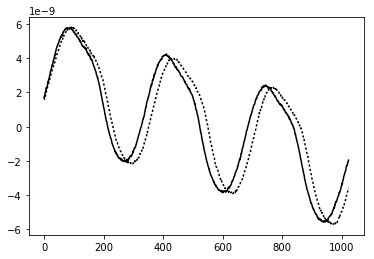

In [6]:
import matplotlib.pyplot as plt

OPMODE_STATICAFM = 2
application.OperatingMode.OperatingMode = OPMODE_STATICAFM

# Start a spectroscopy measurement, and wait until it is done.
spec = application.Spec
spec.Start()
while spec.IsMeasuring:
    pass

# These constants could be defined in the library in the future, this would make the 
# demo much shorter, and still easy to understand:
FORWARD_SPEC = 0
BACKWARD_SPEC = 1
DEFLECTION_CHANNEL = 0
RAW_DATA = 0
PHYSICAL_VALUES = 1

plt.plot(spec.GetLine2(FORWARD_SPEC, DEFLECTION_CHANNEL, 0, RAW_DATA, PHYSICAL_VALUES), 'k')
plt.plot(spec.GetLine2(BACKWARD_SPEC, DEFLECTION_CHANNEL, 0, RAW_DATA, PHYSICAL_VALUES), 'k:')